# Craiglist Car Price

## Background Information:
Sekarang, dalam masa pandemi Covid-19, mobil bekas tiba-tiba menjadi komoditas industri terpanas, seperti di Amerika Serikat. Laporan New York Times pada Selasa, 8 September 2020, mengungkapkan bahwa konsumen memilih kendaraan bekas sebagai mobil kedua atau ketiga sehingga mereka dapat menghindari angkutan umum selama pandemi virus Covid-19.

Permintaan mobil tua juga didorong oleh penghentian produksi mobil baru sekitar dua bulan pada awal 2020. Pada Juli 2020, nilai rata-rata mobil bekas melonjak lebih dari 16 persen, menurut Edmunds.com. Pada Juni, dealer mobil waralaba menjual 1,2 juta mobil dan truk bekas, atau naik 22 persen dari tahun sebelumnya. sumber : https://otomotif.tempo.co/read/1384538/3-alasan-mengapa-orang-amerika-gandrung-mobil-bekas/full&view=ok, https://www.nytimes.com/2020/09/07/business/used-cars-pandemic.html, https://www.caranddriver.com/news/a34003835/used-cars-short-supply-pandemic/

Hal ini yang melatar belakang PT.CuanMobil untuk memiliki Dashboard mengenai harga mobil.

## Problem Statement:
Dengan peluang jual beli mobil bekas yang sedang melonjak penjualannya, membuat banyak orang yang ingin membeli mobil bekas dimasa seperti ini karena ingin menghindari kendaraan umum selama pandemi Covid-19. Namun yang menjadi persoalan mereka takut jika harga yang dijual tidak sesuai ekspektasi.

## Solution:
PT.CuanMobil meminta tolong tim Data Science Purwadhika untuk membuat aplikasi mengenai prediksi harga mobil agar membuat para pembeli mobil bisa mengetahui harga pasti mobil-mobil bekas yang dijual berdasarkan keinginan setiap masyarakat.

## Data Explanation:

pada penelitian ini, dataset yang digunakan berasal dari https://www.kaggle.com/austinreese/craigslist-carstrucks-data. dataset tersebut discrape dari website craiglist pada bulan januari 2020  dan telah di update berkala yang bulan terakhir updatenya adalah bulan September.

- id = entry ID
- url = listing URL
- region = craigslist region
- region_ur = lregion URL
- price = entry price
- year = entry year
- manufacturer = manufacturer of vehicle
- model = model of vehicle
- condition = condition of vehicle
- cylinders = number of cylinders
- fuel = fuel type
- odometer = miles traveled by vehicle
- title_status = title status of vehicle
- transmission = transmission of vehicle
- vin = vehicle entification number
- drive = type of drive
- size = size of vehicle
- type = generic type of vehicle
- paint_color = color of vehicle
- image_url = image URL
- description = listed description of vehicle
- county = useless column left in by mistake
- state = state of listing
- lat = latitude of listing
- long = longitude of listing



In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
!pip install sidetable
import sidetable as stb

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [ ]:
df = pd.read_csv('gdrive/My Drive/folder final project/vehicles.csv')
# jika tidak ditaruh folder manapun, cukup dengan df = pd.read_csv('gdrive/My Drive/vehicles.csv')


In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,1GTEK19T3YE366021,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,NaN,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,NaN,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,NaN,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,1GTHK23D57F102022,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   url           423857 non-null  object 
 2   region        423857 non-null  object 
 3   region_url    423857 non-null  object 
 4   price         423857 non-null  int64  
 5   year          328743 non-null  float64
 6   manufacturer  313242 non-null  object 
 7   model         325384 non-null  object 
 8   condition     176719 non-null  object 
 9   cylinders     197679 non-null  object 
 10  fuel          327214 non-null  object 
 11  odometer      270585 non-null  float64
 12  title_status  327759 non-null  object 
 13  transmission  328065 non-null  object 
 14  vin           184420 non-null  object 
 15  drive         231119 non-null  object 
 16  size          102627 non-null  object 
 17  type          241157 non-null  object 
 18  pain

In [ ]:
df.head().T

NameError: ignored

In [ ]:
#untuk mendeskripsikan dataframe employee yang terdiri dari column, ,typedata,jumlah nan, persentase nan,jumlah variasi data, dan value dari unique data
data_describe = []

for i in df.columns:
    data_describe.append([
        i,
        df[i].dtypes,
        df[i].isnull().sum(),
        round((((df[i].isnull().sum()) / (len(df))) * 100), 2),
        df[i].nunique(),
        df[i].drop_duplicates().values
    ])
# membuat dataframe dengan data data_describe dengan kolom-kolom tersebut
deskripsi = pd.DataFrame(data_describe, columns=['column','type','nan','nan%','nunique','unique'])
deskripsi

,column,type,nan,nan%,nunique,unique
0,id,int64,0,0.00,423857,"[7184791621, 7184773187, 7193375964, 719510881..."
1,url,object,0,0.00,423857,[https://duluth.craigslist.org/ctd/d/duluth-20...
2,region,object,0,0.00,404,"[duluth / superior, new haven, albuquerque, lu..."
3,region_url,object,0,0.00,413,"[https://duluth.craigslist.org, https://newhav..."
4,price,int64,0,0.00,16305,"[6995, 8750, 10900, 12500, 16995, 13995, 7995,..."
5,year,float64,95114,22.44,111,"[2000.0, 2013.0, 2003.0, 2007.0, 2012.0, 2010...."
6,manufacturer,object,110615,26.10,43,"[gmc, hyundai, toyota, mitsubishi, ford, chevr..."
7,model,object,98473,23.23,27042,"[new sierra 1500, sonata, prius, lancer, sierr..."
8,condition,object,247138,58.31,6,"[excellent, good, fair, nan, like new, salvage..."
9,cylinders,object,226178,53.36,8,"[8 cylinders, 4 cylinders, 6 cylinders, nan, 1..."


In [ ]:
#untuk mengecek informasi dari jumlah kolom, baris dan nama kolom
print("Jumlah Kolom: ",df.shape[1]) #indexing 1
print("Jumlah Baris: ",df.shape[0]) #indexing 0
print("Daftar kolom: ",df.columns)

Jumlah Kolom:  25
Jumlah Baris:  423857
Daftar kolom:  Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')


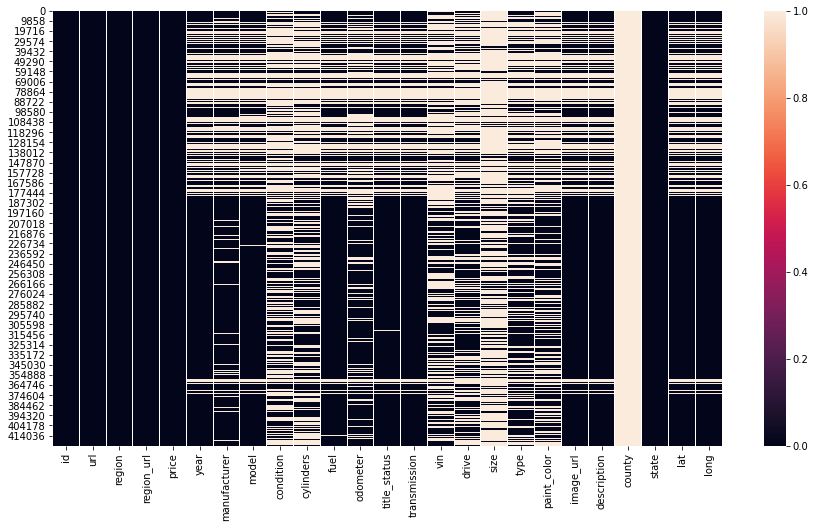

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isna())
plt.show()

Dari hasil deskripsi diatas, terdapat beberapa hal yang perlu di tinjau lebih lanjut. yaitu :
- Terlihat bahwa data yang ingin diolah memiliki rows yang cukup banyak
- ditemukan juga beberapa nan yang ada di beberapa kolom pada dataset ini 
- pada kolom tahun, bentuknya berupa float, sehingga perlu penyesuai menjadi format tahun

sehingga dari poin diatas perlu adanya handling terhadap data tersebut.

## 2.Data Cleaning


Berdasarkan pengecekan terhadap Dataset ini, akan dilakukan limitasi berdasarkan data-data dibeberapa kolom, yaitu :
1. Pada Kolom Tahun, tahun yang akan digunakan adalah dari tahun 2009- 2020
2. Pada Kolom Price, harga terendah akan dimulai dari harga 2000. dan setelah itu akan ada penghapusan outlier dikarenakan range harga yang sangat jauh
3. Pada Kolom Odometer, Odometer akan dibatasi hingga 120.000 
4. Pada kolom Title Status, Category part only dan missing akan di drop karena category tersebut tidak memenuhi kriteria penjualan
5. Pada Kolom Type, category bus didrop karena dirasa tidak mungkin ada orang yang akan membeli bus bekas
6. Pada Kolom Manufacturer, category Harley Davidson didrop karena manufacturer tersebut tidak memiliki mobil 

### 2.1 Handling Column

In [ ]:
df.describe()

,id,price,year,odometer,county,lat,long
count,4.238570e+05,4.238570e+05,328743.000000,2.705850e+05,0.0,324404.000000,324404.000000
mean,7.190602e+09,5.779437e+04,2009.827358,9.942578e+04,NaN,38.731429,-93.949367
std,5.159269e+06,1.002581e+07,10.135809,1.204833e+05,NaN,5.902977,17.930566
min,7.178302e+09,0.000000e+00,1900.000000,0.000000e+00,NaN,-80.386400,-161.394000
25%,7.186688e+09,4.499000e+03,2007.000000,4.432400e+04,NaN,35.054500,-106.678000
50%,7.192068e+09,9.995000e+03,2012.000000,9.174900e+04,NaN,39.366900,-88.009900
75%,7.194909e+09,1.899500e+04,2016.000000,1.372370e+05,NaN,42.517075,-80.832500
max,7.197006e+09,3.808256e+09,2021.000000,1.000000e+07,NaN,80.383400,115.524000


In [ ]:
df.describe(include='O')

,url,region,region_url,manufacturer,model,condition,cylinders,fuel,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,state
count,423857,423857,423857,313242,325384,176719,197679,327214,327759,328065,184420,231119,102627,241157,222203,329661,329654,423857
unique,423857,404,413,43,27042,6,8,5,6,3,103588,3,4,13,12,222413,275765,51
top,https://goldcountry.craigslist.org/cto/d/grass...,columbus,https://salem.craigslist.org,ford,f-150,excellent,6 cylinders,gas,clean,automatic,1HTMRAAM19J040080,4wd,full-size,sedan,white,https://images.craigslist.org/00H0H_lwWjXSEWNa...,VISIT OUR WEBSITE WWW.DIRECTDETAILOFOH.COM HTT...,ca
freq,1,3296,2985,59786,6073,85254,70130,286775,315607,292619,133,99347,52820,64842,57646,2106,144,45798


#### 2.1.1 Handling Column Year

berdasarkan hasil riset, mobil yang mengalami peningkatan penjualan adalah mobil yg memiliki usia dari 6-11 tahun, sedangkan kendaraan tua diperkirakan turun harganya. dan usia rata-rata kendaraan di amerika meningkat menjadi 11.9 tahun sehingga data yang akan diolah akan dilimitasi menjadi 12 tahun.  https://otomotif.tempo.co/read/1370339/usia-rata-rata-kendaraan-di-amerika-meningkat-jadi-119-tahun/full&view=ok

*untuk handling tahun bisa dicek dr pricing , odometer dll

In [ ]:
df["year"].unique()

array([2000., 2013., 2003., 2007., 2012., 2010., 2011., 2014., 2004.,
       2009., 2008., 1994., 1997., 2019., 1980., 2015., 2018., 2016.,
       2006., 2017., 2005., 1964., 1998., 2001., 2002., 1937., 1996.,
       1995., 1989., 1949., 1952., 1990., 1967., 1992., 1993., 1999.,
       1986., 1975., 1970., 1985., 2020., 1966., 1963., 1981., 1938.,
       1972., 1983., 1951., 1947., 1940., 1974., 1987., 1968., 1969.,
       1991., 1979., 1971., 1958., 1955., 1960., 1927., 1950., 1973.,
       1962., 1978., 1977., 1988., 1959., 1976., 1961., 1984., 1953.,
         nan, 1982., 1965., 1957., 1900., 1932., 1933., 1934., 2021.,
       1956., 1930., 1928., 1931., 1929., 1941., 1939., 1919., 1948.,
       1926., 1946., 1936., 1954., 1923., 1935., 1942., 1921., 1944.,
       1924., 1901., 1918., 1913., 1945., 1920., 1943., 1917., 1912.,
       1925., 1915., 1922., 1911.])

In [ ]:
year = 2020
total= 12
for i in range(total):
  tahun = year-i
  if tahun == 2009:
    print(tahun)
    break
  print(tahun,end=', ')

2020, 2019, 2018, 2017, 2016, 2015, 2014, 2013, 2012, 2011, 2010, 2009


Jadi tahun mobil yang akan digunakan adalah dari tahun 2009

In [ ]:
print(f"Jumlah mobil yang dibawah tahun 2008 adalah: {len(df[df['year']<2009])}")
print(f"Jumlah persenan mobil dibawah tahun 2008 adalah: {len(df[df['year']<2009])/len(df['year'])*100}")

Jumlah mobil yang dibawah tahun 2008 adalah: 107591
Jumlah persenan mobil dibawah tahun 2008 adalah: 25.383796893763698


In [ ]:
df = df.drop(df[df['year']<2009].index)


In [ ]:
print(f"Setelah dilakukan drop, maka panjang rows sudah: {len(df[df['year']<2009].index)} ")
print('data sudah berhasil dihapus')
(df[df['year']<2009])

Setelah dilakukan drop, maka panjang rows sudah: 0 
data sudah berhasil dihapus


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long


In [ ]:
df['year'].unique()

array([2013., 2012., 2010., 2011., 2014., 2009., 2019., 2015., 2018.,
       2016., 2017., 2020.,   nan, 2021.])

setelah dilakukan drop, datanya sudah berhasil di hapus namum ketika dilihat persebaran data tahun mobil,ditemukan keanehan yaitu tahun mobil bekas yang ada ditahun 2021, sehingga akan dilakukan drop

In [ ]:
print(f"Jumlah mobil tahun 2021 adalah: {len(df[df['year']==2021])}")
print(f"Jumlah persenan mobil tahun 2021 adalah: {len(df[df['year']==2021])/len(df['year'])*100}")
df[df['year']==2021]

Jumlah mobil tahun 2021 adalah: 174
Jumlah persenan mobil tahun 2021 adalah: 0.05501697937811842


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
6202,7194162420,https://fortmyers.craigslist.org/lee/ctd/d/nap...,ft myers / SW florida,https://fortmyers.craigslist.org,22680,2021.0,hyundai,kona sel automatic,NaN,NaN,gas,8.0,clean,automatic,KM8K22AA6MU600313,fwd,NaN,SUV,white,https://images.craigslist.org/00G0G_XWHC2AG9Kr...,2021 Hyundai Kona SEL Tamiami Hyundai800-499-...,NaN,fl,26.2280,-81.7660
6420,7193568670,https://fortmyers.craigslist.org/chl/ctd/d/pom...,ft myers / SW florida,https://fortmyers.craigslist.org,975,2021.0,NaN,isuzu NPR HD,new,8 cylinders,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00u0u_1m9vG99Udz...,"2021 Isuzu NPR Hd, 16ft pro- scaper . Automati...",NaN,fl,26.2288,-80.1635
7035,7191841338,https://sanantonio.craigslist.org/ctd/d/san-an...,san antonio,https://sanantonio.craigslist.org,37996,2021.0,toyota,venza le hybrid,new,6 cylinders,hybrid,NaN,clean,automatic,NaN,4wd,mid-size,SUV,red,https://images.craigslist.org/00p0p_67dq7lsoUv...,This all New Toyota Venza LE Hybrid Hybrid Edi...,NaN,tx,29.5852,-98.5902
8445,7180860200,https://knoxville.craigslist.org/cto/d/washbur...,knoxville,https://knoxville.craigslist.org,45000,2021.0,hyundai,palisade limited,new,6 cylinders,gas,645.0,clean,automatic,NaN,fwd,NaN,SUV,NaN,https://images.craigslist.org/00W0W_hHYRH6ThFi...,Bought this vehicle less than a week ago. Has...,NaN,tn,36.3106,-83.5937
9180,7194548582,https://orlando.craigslist.org/ctd/d/orlando-2...,orlando,https://orlando.craigslist.org,0,2021.0,kia,telluride sx,like new,6 cylinders,gas,NaN,clean,automatic,NaN,fwd,full-size,SUV,black,https://images.craigslist.org/00U0U_ghzoczvMHJ...,Fully loaded Telluride SX wont last long .Thi...,NaN,fl,28.5803,-81.4396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
407442,7184361544,https://vermont.craigslist.org/ctd/d/williston...,vermont,https://vermont.craigslist.org,0,2021.0,NaN,any and all,NaN,NaN,other,NaN,clean,other,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00O0O_67NoyTVJ8S...,The Thomas Hirchak Company Auto Auction in Wil...,NaN,vt,44.4367,-73.0957
407743,7183496111,https://vermont.craigslist.org/ctd/d/williston...,vermont,https://vermont.craigslist.org,0,2021.0,NaN,any and all,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00i0i_1UHUVzmGmL...,The Thomas Hirchak Public Auto Auction is look...,NaN,vt,44.4367,-73.0957
408133,7192398091,https://indianapolis.craigslist.org/ctd/d/clin...,indianapolis,https://indianapolis.craigslist.org,25469,2021.0,chevrolet,trailblazer,NaN,NaN,gas,9.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,https://images.craigslist.org/00s0s_3GkjWVvxDG...,➔ Want to see more pictures?Paste this link to...,NaN,in,38.4018,-93.7850
414309,7192395910,https://desmoines.craigslist.org/ctd/d/clinton...,des moines,https://desmoines.craigslist.org,25469,2021.0,chevrolet,trailblazer,NaN,NaN,gas,9.0,clean,automatic,NaN,fwd,NaN,NaN,NaN,https://images.craigslist.org/00s0s_3GkjWVvxDG...,➔ Want to see more pictures?Paste this link to...,NaN,ia,41.8574,-90.1855


In [ ]:
df = df.drop(df[df['year']==2021].index)


In [ ]:
print(f"Setelah dilakukan drop, maka panjang rows sudah: {len(df[df['year']<2008].index)} ")
print('Data sudah berhasil dihapus')
(df[df['year']==2021])

Setelah dilakukan drop, maka panjang rows sudah: 0 
Data sudah berhasil dihapus


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long


In [ ]:
df['year'].unique()

array([2013., 2012., 2010., 2011., 2014., 2009., 2019., 2015., 2018.,
       2016., 2017., 2020.,   nan])

In [ ]:
print('Total tahun yang nan: ',df['year'].isna().sum())
print('Jumlah persen data yang nan: ',df['year'].isna().sum()/len(df['year'])*100)

Total tahun yang nan:  95114
Jumlah persen data yang nan:  30.090606532275416


*Catatan Untuk handling nan di kolom tahun akan menggunakan fillna berdasarkan harga rata-rata mobil pertahunnya, sehingga akan dilakukan setelah melakukan handling kolom lainnya dan checking outliers price agar persebaran rata-rata harga pertahunnya terdistribusi secara normal.  

In [ ]:
print('Total tahun yang nan setelah dilakukan handling pada kolom yang lain: ',df['year'].isna().sum())
print('Jumlah persen data yang nan: ',df['year'].isna().sum()/len(df['year'])*100)

Total tahun yang nan setelah dilakukan handling pada kolom yang lain:  790
Jumlah persen data yang nan:  0.5369437704327495


In [ ]:
df['year'].describe()

count    146339.000000
mean       2014.982650
std           2.858784
min        2009.000000
25%        2013.000000
50%        2015.000000
75%        2017.000000
max        2020.000000
Name: year, dtype: float64

In [ ]:
year_price = pd.crosstab(columns='rata-rata', index=df['year'],values=df['price'], aggfunc='mean')
yp = year_price.reset_index()
yp.sort_values(by=['rata-rata'],ascending=False)

col_0,year,rata-rata
11,2020.0,31611.194523
10,2019.0,27965.698935
9,2018.0,25961.123395
8,2017.0,23613.067185
7,2016.0,20638.468533
6,2015.0,19361.517503
5,2014.0,16632.164533
4,2013.0,14570.587974
3,2012.0,13338.690825
2,2011.0,13215.930332


Fillna terhadap kolom berdasarkan rata-rata harga mobil pertahunnya.

In [ ]:
df['year'][(df['price']<10967)&(df['year'].isna())]= df['year'].fillna(2009)
df['year'][(df['price']>=10967)&(df['price']<13216)&(df['year'].isna())]= df['year'].fillna(2010)
df['year'][(df['price']>=13216)&(df['price']<13338)&(df['year'].isna())]= df['year'].fillna(2011)
df['year'][(df['price']>=13338)&(df['price']<14570)&(df['year'].isna())]= df['year'].fillna(2012)
df['year'][(df['price']>=14570)&(df['price']<16632)&(df['year'].isna())]= df['year'].fillna(2013)
df['year'][(df['price']>=16632)&(df['price']<19361)&(df['year'].isna())]= df['year'].fillna(2014)
df['year'][(df['price']>=19361)&(df['price']<20638)&(df['year'].isna())]= df['year'].fillna(2015)
df['year'][(df['price']>=20638)&(df['price']<23613)&(df['year'].isna())]= df['year'].fillna(2016)
df['year'][(df['price']>=23613)&(df['price']<25961)&(df['year'].isna())]= df['year'].fillna(2017)
df['year'][(df['price']>=25961)&(df['price']<27965)&(df['year'].isna())]= df['year'].fillna(2018)
df['year'][(df['price']>=27965)&(df['price']<31611)&(df['year'].isna())]= df['year'].fillna(2019)
df['year'][(df['price']>=31611)&(df['year'].isna())]= df['year'].fillna(2020)

In [ ]:
print(f"Setelah dilakukan fillna, maka panjang rows nan sudah: {(df['year'].isna().sum())} ")
print('data sudah berhasil fillna')
df['year'].isna().sum()

Setelah dilakukan fillna, maka panjang rows nan sudah: 0 
data sudah berhasil fillna


0

In [ ]:
df['year'] = df['year'].apply(np.int64)
df['year'].unique()

array([2013, 2010, 2011, 2009, 2019, 2012, 2014, 2015, 2016, 2017, 2018,
       2020])

#### 2.1.2 Handling Column Price

Pada kolom price, terlihat harga minimal mobil adalah 0. sangat tidak mungkin jika mobil yang hendak dijual bernilai 0, sehingga akan dilakukan drop pada rows yang memiliki harga 0.

In [ ]:
print(f"Panjang rows dari harga mobil yang 0 Rupiah: {len(df[df['price']==0])} ")
df[df['price']==0]

Panjang rows dari harga mobil yang 0 Rupiah: 30829 


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
27,7184323679,https://duluth.craigslist.org/ctd/d/medium-dut...,duluth / superior,https://duluth.craigslist.org,0,2015.0,dodge,i,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,NaN,other,white,https://images.craigslist.org/00O0O_9dIc131O8j...,"All Trucks USA12106 Old River RdRockton, IL 61...",NaN,mn,NaN,NaN
51,7184047617,https://duluth.craigslist.org/ctd/d/mechanics-...,duluth / superior,https://duluth.craigslist.org,0,2016.0,ford,f450 4x4,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,NaN,other,white,https://images.craigslist.org/00E0E_23EOnDEA8x...,"All Trucks USA12106 Old River RdRockton, IL 61...",NaN,mn,NaN,NaN
254,7181170540,https://eastnc.craigslist.org/ctd/d/toyota-tun...,eastern NC,https://eastnc.craigslist.org,0,2015.0,toyota,tundra,NaN,8 cylinders,gas,125245.0,clean,automatic,5TFDW5F18FX445521,4wd,full-size,pickup,white,https://images.craigslist.org/00b0b_koRZnvAwLO...,2015 Toyota Tundra SR5 Pickup TruckPrice: Call...,NaN,nc,NaN,NaN
357,7195162362,https://washingtondc.craigslist.org/doc/ctd/d/...,"washington, DC",https://washingtondc.craigslist.org,0,2013.0,ford,explorer,NaN,NaN,gas,149136.0,clean,automatic,1FM5K7D98DGA03495,NaN,NaN,SUV,black,https://images.craigslist.org/00l0l_8QxfzvcU1e...,2013 FORD EXPLORER XLT Offered by: Nation ...,NaN,dc,38.5856,-76.9461
479,7195159630,https://washingtondc.craigslist.org/mld/ctd/d/...,"washington, DC",https://washingtondc.craigslist.org,0,2013.0,ford,explorer,NaN,NaN,gas,149136.0,clean,automatic,1FM5K7D98DGA03495,NaN,NaN,SUV,black,https://images.craigslist.org/00l0l_8QxfzvcU1e...,2013 FORD EXPLORER XLT Offered by: Nation ...,NaN,dc,38.5856,-76.9461
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423726,7187722559,https://duluth.craigslist.org/ctd/d/enclosed-s...,duluth / superior,https://duluth.craigslist.org,0,2012.0,ford,f350 4x4,NaN,NaN,diesel,0.0,clean,other,77777777777777777,NaN,NaN,other,white,https://images.craigslist.org/00g0g_ilXSIKZX4z...,All Trucks USAAsk for: Craigslist Sales☎ (815)...,NaN,mn,NaN,NaN
423778,7186543838,https://duluth.craigslist.org/ctd/d/ton-servic...,duluth / superior,https://duluth.craigslist.org,0,2014.0,ram,NaN,NaN,NaN,diesel,0.0,clean,automatic,NaN,NaN,NaN,other,white,https://images.craigslist.org/00C0C_cpKLR33FAP...,"All Trucks USA12106 Old River RdRockton, IL 61...",NaN,mn,NaN,NaN
423786,7186393265,https://duluth.craigslist.org/ctd/d/duluth-201...,duluth / superior,https://duluth.craigslist.org,0,2018.0,chevrolet,silverado 1500,NaN,NaN,gas,16497.0,clean,automatic,1GCVKREC4JZ374440,4wd,NaN,NaN,red,https://images.craigslist.org/00000_ieaFwOJnn0...,Duluth Dodge Chrysler Jeep Ram address: 475...,NaN,mn,46.8188,-92.1812
423832,7185455099,https://duluth.craigslist.org/ctd/d/flatbed-st...,duluth / superior,https://duluth.craigslist.org,0,2014.0,ford,f550 4x4,NaN,NaN,diesel,0.0,clean,other,NaN,NaN,NaN,other,white,https://images.craigslist.org/00W0W_g9sMGO1L2P...,"All Trucks USA12106 Old River RdRockton, IL 61...",NaN,mn,NaN,NaN


In [ ]:
len(df[df['price']==0])/len(df['price'])*100

9.753173126811182

Setelah dilakukan pengecekan, terdapat 30829 atau sebanyak 9.75% mobil yang memiliki harga 0. sangat tidak mungkin terjadi ketika pembelian mobil hanya seharga 0 Dollar, serta dengan adanya data yang harganya 0 membuat persebaran data menjadi bias sehingga keputusannya akan dilakukan drop karena jika dilakukan fillna maka akan ada beberapa model mobil yang akan hasil prediksinya menjadi bias.

In [ ]:
df = df.drop(df[df['price']==0].index)


In [ ]:
print(f"Setelah dilakukan drop, maka panjang rows sudah: {len(df[df['price']==0])} ")
print('Data sudah berhasil dihapus')
df[df['price']==0]

Setelah dilakukan drop, maka panjang rows sudah: 0 
Data sudah berhasil dihapus


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long


berdasarkan artikel-artikel yang saya baca, harga mobil bekas di US yang paling murah dan layak untuk digunakan adalah mobil yang kisaran harganya dari $2000, sehingga akan dilakukan limitasi dari 2000 dolar.  https://www.quora.com/How-much-does-a-used-car-cost-in-the-USA, https://www.cargurus.com/Cars/price-trends/

In [ ]:
print(f"Jumlah mobil yang harganya  dibawah $2000 ada {len(df[df['price']<2000])}")
print(f"Jumlah persenan mobil harganya dibawah $2000 ada: {len(df[df['price']<2000])/len(df['price'])*100} %")

Jumlah mobil yang harganya  dibawah $2000 ada 14893
Jumlah persenan mobil harganya dibawah $2000 ada: 5.2207962476732 %


In [ ]:
df = df.drop(df[df['price']<2000].index)


In [ ]:
df['price'].describe()

count    2.703700e+05
mean     5.738650e+04
std      9.661233e+06
min      2.000000e+03
25%      8.950000e+03
50%      1.499100e+04
75%      2.399500e+04
max      2.808349e+09
Name: price, dtype: float64

#### 2.1.3 Handling Column Manufacturer & Column Model

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year             80558
manufacturer     85961
model            80716
condition       173674
cylinders       159335
fuel             81529
odometer        101286
title_status     80943
transmission     80677
vin             144041
drive           132400
size            217865
type            124642
paint_color     135900
image_url        79646
description      79649
county          270370
state                0
lat              80950
long             80950
dtype: int64

terdapat data nan yang cukup tinggi pada manufacturer, sehingga perlu dilakukan pengecekan

In [ ]:
print(f"Jumlah data yang tidak diketahui Merk dan modelnya ada: {len(df[(df['manufacturer'].isna())& (df['model'].isna())])}")
df[(df['manufacturer'].isna())& (df['model'].isna())]

Jumlah data yang tidak diketahui Merk dan modelnya ada: 79647


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
9992,7196847581,https://monroemi.craigslist.org/ctd/d/jackson-...,monroe,https://monroemi.craigslist.org,29900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mi,NaN,NaN
9997,7196735200,https://monroemi.craigslist.org/ctd/d/chesanin...,monroe,https://monroemi.craigslist.org,4995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mi,NaN,NaN
9998,7194525377,https://inlandempire.craigslist.org/cto/d/meni...,inland empire,https://inlandempire.craigslist.org,12500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN
10000,7196656980,https://monroemi.craigslist.org/ctd/d/chesanin...,monroe,https://monroemi.craigslist.org,7995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mi,NaN,NaN
10001,7196608311,https://monroemi.craigslist.org/ctd/d/monroe-2...,monroe,https://monroemi.craigslist.org,31274,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,mi,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375393,7195116233,https://inlandempire.craigslist.org/cto/d/heme...,inland empire,https://inlandempire.craigslist.org,5700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN
375395,7195048279,https://inlandempire.craigslist.org/cto/d/teme...,inland empire,https://inlandempire.craigslist.org,3200,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN
375398,7195046658,https://inlandempire.craigslist.org/ctd/d/nort...,inland empire,https://inlandempire.craigslist.org,9999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN
375399,7195033651,https://inlandempire.craigslist.org/cto/d/rive...,inland empire,https://inlandempire.craigslist.org,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ca,NaN,NaN


setelah dicek dengan syarat manufacturer dan modelnya nan, hampir setiap kolom lainnya juga terdapat nan juga sehingga tidak dapat informasi yang dicari cari, sehinga keputusannya adalah dilakukan drop

In [ ]:
df = df.drop(df[(df['manufacturer'].isna())& (df['model'].isna())].index)


In [ ]:
print('Setelah dilakukan datanya sudah tidak ada')
df[(df['manufacturer'].isna())& (df['model'].isna())]

Setelah dilakukan datanya sudah tidak ada


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long


In [ ]:
df['manufacturer'].isna().sum()

6314

setelah dilakukan drop masi terdapat nan, sehingga perlu dilakukan pengecekan lagi

In [ ]:
df[(df['manufacturer'].isna())]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
18,7195098998,https://albuquerque.craigslist.org/ctd/d/yuma-...,albuquerque,https://albuquerque.craigslist.org,37500,2009.0,NaN,international 8600,excellent,6 cylinders,diesel,NaN,clean,manual,NaN,fwd,full-size,truck,white,https://images.craigslist.org/00202_7t8PFt3uRl...,"2009 INTERNATIONAL, ISM CUMMINS MOTOR 400hp wi...",NaN,nm,32.7093,-114.4910
205,7187420140,https://fargo.craigslist.org/ctd/d/waite-park-...,fargo / moorhead,https://fargo.craigslist.org,4999,2009.0,NaN,No data No data,good,4 cylinders,gas,1699.0,clean,other,A4TSX22GA9P000332,rwd,full-size,truck,white,https://images.craigslist.org/00Z0Z_l4RRXwfRnT...,http://www.goodguysmotorco.com2009 No data No ...,NaN,mn,45.5534,-94.2318
259,7187133608,https://fargo.craigslist.org/ctd/d/fontana-200...,fargo / moorhead,https://fargo.craigslist.org,44995,2009.0,NaN,INTERNATIONAL MH035,NaN,NaN,diesel,82238.0,clean,manual,1HTMRAAM19J040080,fwd,NaN,truck,NaN,https://images.craigslist.org/00l0l_fl36gaeOcI...,2009 International 4400 Offered by: R&B Au...,NaN,mn,34.1072,-117.4550
260,7187127580,https://fargo.craigslist.org/ctd/d/fontana-201...,fargo / moorhead,https://fargo.craigslist.org,150000,2017.0,NaN,KENWORTH T3 SERIES,NaN,NaN,gas,6086.0,clean,NaN,2NKHHJ7X2HM136714,fwd,NaN,truck,NaN,https://images.craigslist.org/00P0P_jg9uPfNTto...,2017 Kenworth VIP Transporter Offered by: ...,NaN,mn,34.1072,-117.4550
371,7186362607,https://winchester.craigslist.org/ctd/d/winche...,winchester,https://winchester.craigslist.org,8495,2014.0,NaN,SCION XB,excellent,4 cylinders,gas,80275.0,clean,automatic,JTLZE4FE8EJ056888,fwd,NaN,SUV,white,https://images.craigslist.org/00v0v_jEHcpHvioE...,2014 *** SCION XB SUV *** Ready To Upgrade ...,NaN,va,39.1453,-78.1890
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423214,7191808517,https://laredo.craigslist.org/cto/d/laredo-201...,laredo,https://laredo.craigslist.org,17500,2013.0,NaN,freightliner m2,good,6 cylinders,diesel,292090.0,clean,automatic,3ALACWDT8DDFG4711,rwd,NaN,van,white,https://images.craigslist.org/00S0S_bF3dbRJlrV...,Selling Freightliner M2 With Cumming ISB 6.7L ...,NaN,tx,27.5858,-99.5099
423289,7185346232,https://up.craigslist.org/cto/d/baraga-2009-fr...,upper peninsula,https://up.craigslist.org,26000,2009.0,NaN,2009 Freightliner Columbia,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_lUGxg41fn3...,"2009 Freightliner Columbia 675000 miles, 13 sp...",NaN,mi,46.7704,-88.4210
423412,7185350063,https://bemidji.craigslist.org/ctd/d/gilberts-...,bemidji,https://bemidji.craigslist.org,65900,2009.0,NaN,International 4300,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00707_jueyaSjvZh...,*** SHIPPING AVAILABLE *** Altec A40P Cable P...,NaN,mn,42.1175,-88.4375
423557,7193497170,https://southjersey.craigslist.org/ctd/d/west-...,south jersey,https://southjersey.craigslist.org,13950,2017.0,NaN,VOLKSWAGON PASSAT 1.8T,like new,4 cylinders,gas,21997.0,clean,automatic,NaN,fwd,NaN,sedan,white,https://images.craigslist.org/00k0k_5Ce74wiFbz...,ALL OUR VEHICLES ARE KEPT IN OUR INDOOR SHOWRO...,NaN,nj,39.8044,-74.9154


setelah melakukan pengecekan, ternyata ada yg model dari mobil tersebut tidak memiliki data , sehingga akan dilakukan pengecekan terlebih dahulu



In [ ]:
df[(df['manufacturer'].isna())&(df['model']=='No data No data')]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
205,7187420140,https://fargo.craigslist.org/ctd/d/waite-park-...,fargo / moorhead,https://fargo.craigslist.org,4999,2009.0,NaN,No data No data,good,4 cylinders,gas,1699.0,clean,other,A4TSX22GA9P000332,rwd,full-size,truck,white,https://images.craigslist.org/00Z0Z_l4RRXwfRnT...,http://www.goodguysmotorco.com2009 No data No ...,NaN,mn,45.5534,-94.2318
57593,7187413811,https://stcloud.craigslist.org/ctd/d/waite-par...,st cloud,https://stcloud.craigslist.org,4999,2009.0,NaN,No data No data,good,4 cylinders,gas,1699.0,clean,other,A4TSX22GA9P000332,rwd,full-size,truck,white,https://images.craigslist.org/00Z0Z_l4RRXwfRnT...,http://www.goodguysmotorco.com2009 No data No ...,NaN,mn,45.5534,-94.2318
132187,7187431906,https://wausau.craigslist.org/ctd/d/waite-park...,wausau,https://wausau.craigslist.org,4999,2009.0,NaN,No data No data,good,4 cylinders,gas,1699.0,clean,other,A4TSX22GA9P000332,rwd,full-size,truck,white,https://images.craigslist.org/00Z0Z_l4RRXwfRnT...,http://www.goodguysmotorco.com2009 No data No ...,NaN,wi,45.5534,-94.2318
189932,7187436366,https://siouxfalls.craigslist.org/ctd/d/waite-...,sioux falls / SE SD,https://siouxfalls.craigslist.org,4999,2009.0,NaN,No data No data,good,4 cylinders,gas,1699.0,clean,other,A4TSX22GA9P000332,rwd,full-size,truck,white,https://images.craigslist.org/00Z0Z_l4RRXwfRnT...,http://www.goodguysmotorco.com2009 No data No ...,NaN,sd,45.5534,-94.2318


terdapat 4 data yang memiliki value 'nodata ' pada kolom model, sehingga keputusannya adalah di drop

In [ ]:
df = df.drop(df[df['model']=='No data No data'].index)


In [ ]:
df[(df['manufacturer'].isna())]

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
18,7195098998,https://albuquerque.craigslist.org/ctd/d/yuma-...,albuquerque,https://albuquerque.craigslist.org,37500,2009.0,NaN,international 8600,excellent,6 cylinders,diesel,NaN,clean,manual,NaN,fwd,full-size,truck,white,https://images.craigslist.org/00202_7t8PFt3uRl...,"2009 INTERNATIONAL, ISM CUMMINS MOTOR 400hp wi...",NaN,nm,32.7093,-114.4910
259,7187133608,https://fargo.craigslist.org/ctd/d/fontana-200...,fargo / moorhead,https://fargo.craigslist.org,44995,2009.0,NaN,INTERNATIONAL MH035,NaN,NaN,diesel,82238.0,clean,manual,1HTMRAAM19J040080,fwd,NaN,truck,NaN,https://images.craigslist.org/00l0l_fl36gaeOcI...,2009 International 4400 Offered by: R&B Au...,NaN,mn,34.1072,-117.4550
260,7187127580,https://fargo.craigslist.org/ctd/d/fontana-201...,fargo / moorhead,https://fargo.craigslist.org,150000,2017.0,NaN,KENWORTH T3 SERIES,NaN,NaN,gas,6086.0,clean,NaN,2NKHHJ7X2HM136714,fwd,NaN,truck,NaN,https://images.craigslist.org/00P0P_jg9uPfNTto...,2017 Kenworth VIP Transporter Offered by: ...,NaN,mn,34.1072,-117.4550
371,7186362607,https://winchester.craigslist.org/ctd/d/winche...,winchester,https://winchester.craigslist.org,8495,2014.0,NaN,SCION XB,excellent,4 cylinders,gas,80275.0,clean,automatic,JTLZE4FE8EJ056888,fwd,NaN,SUV,white,https://images.craigslist.org/00v0v_jEHcpHvioE...,2014 *** SCION XB SUV *** Ready To Upgrade ...,NaN,va,39.1453,-78.1890
405,7186273908,https://fargo.craigslist.org/cto/d/moorhead-tr...,fargo / moorhead,https://fargo.craigslist.org,15000,2012.0,NaN,freightliner m2,good,6 cylinders,diesel,NaN,clean,automatic,NaN,fwd,mid-size,truck,white,https://images.craigslist.org/00r0r_2Bez1qn9rc...,good truck ready to go,NaN,mn,46.8677,-96.7572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423214,7191808517,https://laredo.craigslist.org/cto/d/laredo-201...,laredo,https://laredo.craigslist.org,17500,2013.0,NaN,freightliner m2,good,6 cylinders,diesel,292090.0,clean,automatic,3ALACWDT8DDFG4711,rwd,NaN,van,white,https://images.craigslist.org/00S0S_bF3dbRJlrV...,Selling Freightliner M2 With Cumming ISB 6.7L ...,NaN,tx,27.5858,-99.5099
423289,7185346232,https://up.craigslist.org/cto/d/baraga-2009-fr...,upper peninsula,https://up.craigslist.org,26000,2009.0,NaN,2009 Freightliner Columbia,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_lUGxg41fn3...,"2009 Freightliner Columbia 675000 miles, 13 sp...",NaN,mi,46.7704,-88.4210
423412,7185350063,https://bemidji.craigslist.org/ctd/d/gilberts-...,bemidji,https://bemidji.craigslist.org,65900,2009.0,NaN,International 4300,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00707_jueyaSjvZh...,*** SHIPPING AVAILABLE *** Altec A40P Cable P...,NaN,mn,42.1175,-88.4375
423557,7193497170,https://southjersey.craigslist.org/ctd/d/west-...,south jersey,https://southjersey.craigslist.org,13950,2017.0,NaN,VOLKSWAGON PASSAT 1.8T,like new,4 cylinders,gas,21997.0,clean,automatic,NaN,fwd,NaN,sedan,white,https://images.craigslist.org/00k0k_5Ce74wiFbz...,ALL OUR VEHICLES ARE KEPT IN OUR INDOOR SHOWRO...,NaN,nj,39.8044,-74.9154


karena selebih data yang terdapat nan dikolom manufacturer memiliki value pada kolom model,maka keputusannya adalah memberikan nama other kepada nan tersebut

In [ ]:
df['manufacturer'] = df['manufacturer'].fillna('other')

In [ ]:
print('Jumlah data other ada:', len(df[df['manufacturer']=='other']))
df[df['manufacturer']=='other']

Jumlah data other ada: 6310


,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
18,7195098998,https://albuquerque.craigslist.org/ctd/d/yuma-...,albuquerque,https://albuquerque.craigslist.org,37500,2009.0,other,international 8600,excellent,6 cylinders,diesel,NaN,clean,manual,NaN,fwd,full-size,truck,white,https://images.craigslist.org/00202_7t8PFt3uRl...,"2009 INTERNATIONAL, ISM CUMMINS MOTOR 400hp wi...",NaN,nm,32.7093,-114.4910
259,7187133608,https://fargo.craigslist.org/ctd/d/fontana-200...,fargo / moorhead,https://fargo.craigslist.org,44995,2009.0,other,INTERNATIONAL MH035,NaN,NaN,diesel,82238.0,clean,manual,1HTMRAAM19J040080,fwd,NaN,truck,NaN,https://images.craigslist.org/00l0l_fl36gaeOcI...,2009 International 4400 Offered by: R&B Au...,NaN,mn,34.1072,-117.4550
260,7187127580,https://fargo.craigslist.org/ctd/d/fontana-201...,fargo / moorhead,https://fargo.craigslist.org,150000,2017.0,other,KENWORTH T3 SERIES,NaN,NaN,gas,6086.0,clean,NaN,2NKHHJ7X2HM136714,fwd,NaN,truck,NaN,https://images.craigslist.org/00P0P_jg9uPfNTto...,2017 Kenworth VIP Transporter Offered by: ...,NaN,mn,34.1072,-117.4550
371,7186362607,https://winchester.craigslist.org/ctd/d/winche...,winchester,https://winchester.craigslist.org,8495,2014.0,other,SCION XB,excellent,4 cylinders,gas,80275.0,clean,automatic,JTLZE4FE8EJ056888,fwd,NaN,SUV,white,https://images.craigslist.org/00v0v_jEHcpHvioE...,2014 *** SCION XB SUV *** Ready To Upgrade ...,NaN,va,39.1453,-78.1890
405,7186273908,https://fargo.craigslist.org/cto/d/moorhead-tr...,fargo / moorhead,https://fargo.craigslist.org,15000,2012.0,other,freightliner m2,good,6 cylinders,diesel,NaN,clean,automatic,NaN,fwd,mid-size,truck,white,https://images.craigslist.org/00r0r_2Bez1qn9rc...,good truck ready to go,NaN,mn,46.8677,-96.7572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423214,7191808517,https://laredo.craigslist.org/cto/d/laredo-201...,laredo,https://laredo.craigslist.org,17500,2013.0,other,freightliner m2,good,6 cylinders,diesel,292090.0,clean,automatic,3ALACWDT8DDFG4711,rwd,NaN,van,white,https://images.craigslist.org/00S0S_bF3dbRJlrV...,Selling Freightliner M2 With Cumming ISB 6.7L ...,NaN,tx,27.5858,-99.5099
423289,7185346232,https://up.craigslist.org/cto/d/baraga-2009-fr...,upper peninsula,https://up.craigslist.org,26000,2009.0,other,2009 Freightliner Columbia,NaN,NaN,diesel,NaN,clean,manual,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00l0l_lUGxg41fn3...,"2009 Freightliner Columbia 675000 miles, 13 sp...",NaN,mi,46.7704,-88.4210
423412,7185350063,https://bemidji.craigslist.org/ctd/d/gilberts-...,bemidji,https://bemidji.craigslist.org,65900,2009.0,other,International 4300,NaN,NaN,diesel,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00707_jueyaSjvZh...,*** SHIPPING AVAILABLE *** Altec A40P Cable P...,NaN,mn,42.1175,-88.4375
423557,7193497170,https://southjersey.craigslist.org/ctd/d/west-...,south jersey,https://southjersey.craigslist.org,13950,2017.0,other,VOLKSWAGON PASSAT 1.8T,like new,4 cylinders,gas,21997.0,clean,automatic,NaN,fwd,NaN,sedan,white,https://images.craigslist.org/00k0k_5Ce74wiFbz...,ALL OUR VEHICLES ARE KEPT IN OUR INDOOR SHOWRO...,NaN,nj,39.8044,-74.9154


In [ ]:
df['manufacturer'].unique()

array(['hyundai', 'toyota', 'ford', 'chevrolet', 'other', 'jeep',
       'subaru', 'nissan', 'dodge', 'rover', 'lexus', 'gmc', 'chrysler',
       'mini', 'mercedes-benz', 'cadillac', 'bmw', 'ram', 'kia', 'audi',
       'acura', 'buick', 'honda', 'volkswagen', 'volvo', 'pontiac',
       'lincoln', 'mazda', 'infiniti', 'mitsubishi', 'saturn', 'fiat',
       'jaguar', 'tesla', 'ferrari', 'mercury', 'land rover',
       'harley-davidson', 'alfa-romeo', 'aston-martin', 'porche',
       'hennessey', 'morgan'], dtype=object)

setelah dilakukan pengecekan unique pada merk mobil, ditemukan merk harley davidson yang sebenarnya adalah merk motor, maka dilakukan pengecekan terhadap model tersebut

In [ ]:
df[df['manufacturer']=='harley-davidson']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
14885,7193774007,https://sarasota.craigslist.org/ctd/d/sarasota...,sarasota-bradenton,https://sarasota.craigslist.org,10888,2012.0,harley-davidson,davidson ultra glide,NaN,NaN,other,31609.0,clean,other,1HD1KEM13CB604938,NaN,NaN,NaN,NaN,https://images.craigslist.org/00Z0Z_aLkbHTA2St...,2012 *Harley Davidson* *ULTRA GLIDE* *ULTRA GL...,NaN,fl,27.2866,-82.4770
32659,7192303520,https://wichita.craigslist.org/ctd/d/wichita-2...,wichita,https://wichita.craigslist.org,9995,2012.0,harley-davidson,flstfb,NaN,NaN,gas,13144.0,clean,automatic,1HD1JNV16CB032653,NaN,NaN,NaN,black,https://images.craigslist.org/00Z0Z_iZWErioaPM...,America's Auto Mall address: 11209 Kellogg ...,NaN,ks,37.6640,-97.4722
51782,7192933427,https://maine.craigslist.org/ctd/d/methuen-201...,maine,https://maine.craigslist.org,18995,2016.0,harley-davidson,davidson fltru / road gli,NaN,NaN,gas,4824.0,clean,NaN,1HD1KGL11GB668253,NaN,NaN,other,black,https://images.craigslist.org/00I0I_gbgRNWJp9n...,2016 HARLEY-DAVIDSON FLTRU ROAD GLIDE ULTRA ...,NaN,me,42.7562,-71.2103
53529,7192278902,https://maine.craigslist.org/ctd/d/plaistow-20...,maine,https://maine.craigslist.org,7990,2010.0,harley-davidson,ultra classic,NaN,NaN,other,65030.0,clean,NaN,1HD1FC414AB666760,NaN,NaN,other,NaN,https://images.craigslist.org/00T0T_hMDFUlGFHn...,2010 Harley-Davidson ULTRA CLASSIC Offered...,NaN,me,42.8350,-71.1078
60731,7194282840,https://nh.craigslist.org/ctd/d/methuen-2016-h...,new hampshire,https://nh.craigslist.org,18995,2016.0,harley-davidson,davidson fltru / road gli,NaN,NaN,gas,4824.0,clean,NaN,1HD1KGL11GB668253,NaN,NaN,other,black,https://images.craigslist.org/00I0I_gbgRNWJp9n...,2016 HARLEY-DAVIDSON FLTRU ROAD GLIDE ULTRA ...,NaN,nh,42.7562,-71.2103
62583,7192910994,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,15499,2014.0,harley-davidson,ultra limited,NaN,NaN,gas,15899.0,clean,automatic,1HD1KEL10EB653857,NaN,NaN,NaN,NaN,https://images.craigslist.org/00T0T_fnDi2DZuPp...,Rattlesnake Mountain Harley-Davidson address: ...,NaN,wa,46.1914,-119.1680
65134,7191942187,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,14599,2014.0,harley-davidson,ultra limited,NaN,NaN,gas,43102.0,clean,automatic,1HD1KEL11EB621516,NaN,NaN,NaN,red,https://images.craigslist.org/00202_l590CdXzJS...,Rattlesnake Mountain Harley-Davidson address: ...,NaN,wa,46.1914,-119.1680
65135,7191942168,https://kpr.craigslist.org/ctd/d/kennewick-201...,kennewick-pasco-richland,https://kpr.craigslist.org,14999,2013.0,harley-davidson,electra glide,NaN,NaN,gas,17555.0,clean,automatic,1HD1KEM13DB618386,NaN,NaN,NaN,NaN,https://images.craigslist.org/01717_d2hTkdaBuc...,Rattlesnake Mountain Harley-Davidson address: ...,NaN,wa,46.1914,-119.1680
66476,7193517386,https://nh.craigslist.org/ctd/d/plaistow-2010-...,new hampshire,https://nh.craigslist.org,7990,2010.0,harley-davidson,ultra classic,NaN,NaN,other,65030.0,clean,NaN,1HD1FC414AB666760,NaN,NaN,other,NaN,https://images.craigslist.org/00T0T_hMDFUlGFHn...,2010 Harley-Davidson ULTRA CLASSIC Offered...,NaN,nh,42.8350,-71.1078
74773,7192936232,https://boston.craigslist.org/gbs/ctd/d/methue...,boston,https://boston.craigslist.org,18995,2016.0,harley-davidson,davidson fltru / road gli,NaN,NaN,gas,4824.0,clean,NaN,1HD1KGL11GB668253,NaN,NaN,other,black,https://images.craigslist.org/00I0I_gbgRNWJp9n...,2016 HARLEY-DAVIDSON FLTRU ROAD GLIDE ULTRA ...,NaN,ma,42.7562,-71.2103


setelah dilakukan pengecekan pada salah satu model harley, terbukti bahwa model tersebut adalah motor, sehingga akan dilakukan dropping 

In [ ]:
df = df.drop(df[df['manufacturer']=='harley-davidson'].index)
df[df['manufacturer']=='harley-davidson']

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long


In [ ]:
df['manufacturer'].unique()

array(['hyundai', 'toyota', 'ford', 'chevrolet', 'other', 'jeep',
       'subaru', 'nissan', 'dodge', 'rover', 'lexus', 'gmc', 'chrysler',
       'mini', 'mercedes-benz', 'cadillac', 'bmw', 'ram', 'kia', 'audi',
       'acura', 'buick', 'honda', 'volkswagen', 'volvo', 'pontiac',
       'lincoln', 'mazda', 'infiniti', 'mitsubishi', 'saturn', 'fiat',
       'jaguar', 'tesla', 'ferrari', 'mercury', 'land rover',
       'alfa-romeo', 'aston-martin', 'porche', 'hennessey', 'morgan'],
      dtype=object)

In [ ]:
r =df[df['manufacturer']=='rover']
print('total data merk rover:',len(r))
print(r['model'].unique())
lr= df[df['manufacturer']=='land rover']
print('total data merk land rover:',len(lr))
print(lr['model'].unique())

total data merk rover: 804
['sport' nan 'evoque 4wd' 'evoque' 'sport hse' 'lr4 hse lux' 'velar' 'hse'
 'evoque r-dynamic s' 'autobiography' 'discovery sport' 'lr2'
 'discovery sport hse' 'se' 'lr4' 'sport 4x4' 'range evoque pure'
 'range supercharged' 'discovery' 'lr4 hse sport utility'
 'range velar p380' 'lr2 hse sport utility' 'lr2 hse' 'autobiog'
 'evoque h' 'evoque se premium' 'evoque autobiography' 'lr4 hse luxury'
 'range sport autobiogr' 'hse lux' 'range sport hse' 'lr2 awd'
 'discovery “sport”' 'discovery hse' 'discovery sport se' 'discovry sport'
 'hse tdi' 'range evoque p250 se' 'evoque p' 'evo' 'sport hse lux'
 'sport supercharged' 'lr4 hse' 'sport se' 'range evoque se' 'velar p2'
 'evoque pure 4x4 gas' 'range' 'luxury' 'superchar' 'supercha' 'lr 4'
 'evoque pure' 'premium' 'sport 3.' 'evoque 92k'
 'discovery sport se automatic' 'evoque hs' 'rogue' 'sport au' 'lr2 base'
 'lr4 luxury' 'discovery hse. 1k mi' '- lr4' 'sport sup' 'enogue' 'sc'
 '4wd' 'range evoque se sport' '4w

setelah dilakukan pengecekan, ditemukan bahwa kedua merk tersebut memiliki model mobil yang sama, sehingga akan dimerge menjadi 1 ke merk land rover

In [ ]:
df['manufacturer'].replace('rover','land rover', inplace =True)
df['manufacturer'].unique()

array(['hyundai', 'toyota', 'ford', 'chevrolet', 'other', 'jeep',
       'subaru', 'nissan', 'dodge', 'land rover', 'lexus', 'gmc',
       'chrysler', 'mini', 'mercedes-benz', 'cadillac', 'bmw', 'ram',
       'kia', 'audi', 'acura', 'buick', 'honda', 'volkswagen', 'volvo',
       'pontiac', 'lincoln', 'mazda', 'infiniti', 'mitsubishi', 'saturn',
       'fiat', 'jaguar', 'tesla', 'ferrari', 'mercury', 'alfa-romeo',
       'aston-martin', 'porche', 'hennessey', 'morgan'], dtype=object)

In [ ]:
df['model'].isna().sum()

1067

Masih terdapat mobil yang modelnya masih null, maka akan dilakukan pengecekan lagi

In [ ]:
df[(df['model'].isnull())].head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
32,7184264415,https://duluth.craigslist.org/ctd/d/lincoln-20...,duluth / superior,https://duluth.craigslist.org,13995,2018.0,subaru,NaN,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00k0k_k3nyXjGHde...,"2018 Subaru Legacy Premium 17,098 Low-Miles! ...",NaN,mn,40.8392,-96.6532
543,7183640218,https://winchester.craigslist.org/cto/d/stephe...,winchester,https://winchester.craigslist.org,30000,2015.0,volvo,NaN,NaN,NaN,diesel,913115.0,clean,automatic,NaN,NaN,NaN,NaN,white,https://images.craigslist.org/00707_5BEdOOfbhd...,Please Call or Email For More Details,NaN,va,39.0834,-78.1907
1335,7182094635,https://spacecoast.craigslist.org/ctd/d/miami-...,space coast,https://spacecoast.craigslist.org,37900,2016.0,land rover,NaN,NaN,NaN,diesel,103000.0,clean,NaN,SALGS2KF4GA268259,NaN,NaN,SUV,black,https://images.craigslist.org/00T0T_hJLdj1mIzJ...,2016 Land Rover Range Rover HSE Td6 AWD 4dr SU...,NaN,fl,25.6558,-80.3814
1579,7185032616,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,25000,2009.0,ram,NaN,NaN,NaN,diesel,135992.0,clean,automatic,3D7MX38L39G505087,4wd,NaN,pickup,silver,https://images.craigslist.org/00E0E_4S5sZGV3BR...,2009 Dodge Ram 3500 SLT Offered by: CDJR o...,NaN,wa,48.7569,-122.4520
1683,7192286047,https://mcallen.craigslist.org/cto/d/hidalgo-2...,mcallen / edinburg,https://mcallen.craigslist.org,3250,2012.0,ford,NaN,NaN,NaN,gas,NaN,clean,automatic,NaN,NaN,NaN,NaN,NaN,https://images.craigslist.org/00Z0Z_9vzqMvvKSM...,2012 ford focos 4 puertas 4 cilindros clima ti...,NaN,tx,26.0905,-98.2334


setelah dilakukan pengecekan ternyata model mobil yang memiliki nan juga masi memiliki beberapa kolom yang nan juga maka keputusannya di drop

In [ ]:
print('Jumlah Null:',df['model'].isnull().sum() )
print('Total persen dari null', df['model'].isnull().sum()/len(df)*100)
df = df.drop(df[df['model'].isnull()].index)
print(100*'=')
print('total nul',df['model'].isna().sum())

Jumlah Null: 1067
Total persen dari null 0.5596232115134477
total nul 0


#### 2.1.4 Handling Column Odometer

In [ ]:
df['odometer'].describe()

count    1.682970e+05
mean     8.173542e+04
std      9.494559e+04
min      0.000000e+00
25%      3.630000e+04
50%      7.491600e+04
75%      1.145910e+05
max      9.400000e+06
Name: odometer, dtype: float64

Berdasarkan sumber artikel yang saya temukan bahwa batas ideal rata-rata penggunaan mobil adalah 150.000 miles. sehingga sangat di rekomendasikan jika ingin membeli mobil bekas adalah yang odometernya tidak melebihi 120.000. karena jika melebihi odometer tersebut biasanya usia mobil sudah tidak bertahan lama dan bakal sering kebengkel. oleh karena itu pada data ini akan dilakukan limitasi dengan odometer maksimalnya adalah 120.000. Sumber : https://thenewswheel.com/how-many-miles-is-too-many-for-a-used-car/

In [ ]:
print('persentase mobil diatas 120.000 km : ',len(df[df['odometer']>120000])/len(df['odometer'])*100)
print('total mobil diatas 120.000 km adalah sebanyak: ',len(df[df['odometer']>120000]))
print('Jumlah Mobil yang tidak diketahui odometernya: ', len(df[df['odometer'].isna()]))
print('persentase mobil yang tidak diketahui odometernya: ',len(df[df['odometer'].isna()])/(len(df['odometer'])))

persentase mobil diatas 120.000 km :  19.528262577994376
total mobil diatas 120.000 km adalah sebanyak:  37025
Jumlah Mobil yang tidak diketahui odometernya:  21300
persentase mobil yang tidak diketahui odometernya:  0.11234354973971107


In [ ]:
df = df.drop(df[(df['odometer']>120000)].index)
print('Total Null pada kolom odometer ada:',df['odometer'].isna().sum())

Total Null pada kolom odometer ada: 21300


*Catatan Untuk handling nan di kolom odometer akan menggunakan fillna berdasarkan odometer rata-rata mobil pertahunnya, sehingga akan dilakukan setelah melakukan fillna tahun agar persebaran rata-rata odometer pertahunnya terdistribusi secara normal.

In [ ]:
print('Jumlah Nan Setelah melakukan handling pada kolom lainnya:',df['odometer'].isna().sum())

Jumlah Nan Setelah melakukan handling pada kolom lainnya: 20755


In [ ]:
year_odometer = pd.crosstab(columns='rata-rata', index=df['year'],values=df['odometer'], aggfunc='mean')
yo = year_odometer.reset_index()
yo.sort_values(by=['rata-rata'],ascending=False)

col_0,year,rata-rata
0,2009,87691.192750
1,2010,87371.263563
2,2011,87261.612615
3,2012,84450.260548
4,2013,81329.477961
5,2014,76187.669109
6,2015,70881.394928
7,2016,60825.845739
8,2017,44895.931906
9,2018,35565.112883


Fillna terhadap kolom berdasarkan rata-rata odometer mobil pertahunnya.

In [ ]:
df['odometer'][(df['year']==2009)&(df['odometer'].isna())]= df['odometer'][df['year']==2009].mean()
df['odometer'][(df['year']==2010)&(df['odometer'].isna())]= df['odometer'][df['year']==2010].mean()
df['odometer'][(df['year']==2011)&(df['odometer'].isna())]= df['odometer'][df['year']==2011].mean()
df['odometer'][(df['year']==2012)&(df['odometer'].isna())]= df['odometer'][df['year']==2012].mean()
df['odometer'][(df['year']==2013)&(df['odometer'].isna())]= df['odometer'][df['year']==2013].mean()
df['odometer'][(df['year']==2014)&(df['odometer'].isna())]= df['odometer'][df['year']==2014].mean()
df['odometer'][(df['year']==2015)&(df['odometer'].isna())]= df['odometer'][df['year']==2015].mean()
df['odometer'][(df['year']==2016)&(df['odometer'].isna())]= df['odometer'][df['year']==2016].mean()
df['odometer'][(df['year']==2017)&(df['odometer'].isna())]= df['odometer'][df['year']==2017].mean()
df['odometer'][(df['year']==2018)&(df['odometer'].isna())]= df['odometer'][df['year']==2018].mean()
df['odometer'][(df['year']==2019)&(df['odometer'].isna())]= df['odometer'][df['year']==2019].mean()
df['odometer'][(df['year']==2020)&(df['odometer'].isna())]= df['odometer'][df['year']==2020].mean()


In [ ]:
print(f"Setelah dilakukan fillna, maka panjang rows nan sudah: {(df['odometer'].isna().sum())} ")
print('data sudah berhasil dihandling')
df['odometer'].isna().sum()

Setelah dilakukan fillna, maka panjang rows nan sudah: 0 
data sudah berhasil dihandling


0

In [ ]:
df['odometer'].describe()

count    147129.000000
mean      61360.041941
std       32203.608878
min           0.000000
25%       34047.000000
50%       63172.000000
75%       87371.263563
max      120000.000000
Name: odometer, dtype: float64

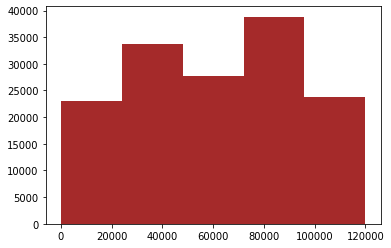

In [ ]:
plt.hist(df["odometer"], bins = 5, color = "brown")
plt.show()

In [ ]:
df['odometer'] = df['odometer'].apply(np.int64)
df['odometer'].unique()

array([ 90821,  92800, 108124, ..., 105242,  17935,  32700])

#### 2.1.5 Handling Column Type

In [ ]:
print(df['type'].value_counts())
print(100*'=')
print('Total data Null dari column type ada: ',df['type'].isnull().sum())

sedan          33918
SUV            31144
pickup         11424
truck          10228
other           6737
coupe           5849
hatchback       5588
wagon           4268
van             3728
mini-van        1952
convertible     1442
bus              119
offroad          119
Name: type, dtype: int64
Total data Null dari column type ada:  36056


Karena di kolom type banyak data null, maka data tersebut akan diisi dengan other

In [ ]:
# fillna type
df['type'] = df['type'].fillna(value='other')

In [ ]:
df['type'].value_counts()

other          42793
sedan          33918
SUV            31144
pickup         11424
truck          10228
coupe           5849
hatchback       5588
wagon           4268
van             3728
mini-van        1952
convertible     1442
bus              119
offroad          119
Name: type, dtype: int64

Pada Kolom Type, category bus didrop karena dirasa tidak mungkin ada yang membeli bus untuk keperluan pribadi



In [ ]:
df = df.drop(df[(df['type']=='bus')].index)


In [ ]:
df['type'].value_counts()

other          42793
sedan          33918
SUV            31144
pickup         11424
truck          10228
coupe           5849
hatchback       5588
wagon           4268
van             3728
mini-van        1952
convertible     1442
offroad          119
Name: type, dtype: int64

#### 2.1.6 Handling Column Title Status

berdasarkan referensi dari artikel tersebut, ditemukan bahwa jenis parts only adalah penjualan mengenai suku cadang mobil dan missing adalah kendaraan yang berkas berkasnya hilang, sehingga untuk categori ini jika ada mobil yang memiliki status tersebut, akan dilakukan drop reffrence https://www.cartitles.com/different-types-of-car-titles/, https://www.autoblog.com/2016/09/29/how-to-buy-a-car-without-a-title/#:~:text=A%20missing%20title%20can%20be,a%20vehicle%20history%20report%20online.&text=A%20VHR%20tells%20you%20the,previous%20accidents%20or%20insurance%20claims

In [ ]:
print(df['title_status'].value_counts())
print('nan:',df['title_status'].isna().sum())

clean         144219
rebuilt         4031
salvage         1698
lien            1388
parts only        18
missing           12
Name: title_status, dtype: int64
nan: 1087


In [ ]:
df['title_status'].fillna('unknown',inplace=True)

In [ ]:
df = df.drop(df[df['title_status']=='missing'].index)
df = df.drop(df[df['title_status']=='parts only'].index)
df['title_status'].unique()

array(['clean', 'lien', 'rebuilt', 'salvage', 'unknown'], dtype=object)

In [ ]:
df['title_status'].value_counts()

clean      144219
rebuilt      4031
salvage      1698
lien         1388
unknown      1087
Name: title_status, dtype: int64

#### 2.1.7 Handling Collum Condition, Cylinders, Type, drive, Size, fuel

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year               908
manufacturer         0
model                0
condition        77140
cylinders        66324
fuel              1626
odometer         21278
title_status         0
transmission       882
vin              51371
drive            42771
size            113116
type                 0
paint_color      45937
image_url            0
description          2
county          152423
state                0
lat                947
long               947
dtype: int64

In [ ]:
print(df['condition'].value_counts())
print(100*'=')
print('Total Null pada kolom condition: ',df['condition'].isnull().sum())
print(100*'=')
print(df['cylinders'].value_counts())
print(100*'=')
print('Total Null pada kolom cylinders: ',df['cylinders'].isnull().sum())
print(100*'=')
print(df['drive'].value_counts())
print(100*'=')
print('Total Null pada kolom drive: ',df['drive'].isnull().sum())
print(100*'=')
print(df['size'].value_counts())
print(100*'=')
print('Total Null pada kolom size: ',df['size'].isnull().sum())
print(100*'=')
print(df['transmission'].value_counts())
print(100*'=')
print('Total Null pada kolom transmission: ',df['transmission'].isna().sum())
print(100*'=')
print(df['paint_color'].value_counts())
print(100*'=')
print('Total Null pada kolom paint color: ',df['paint_color'].isna().sum())


excellent    38060
good         25654
like new     10684
new            610
fair           210
salvage         65
Name: condition, dtype: int64
Total Null pada kolom condition:  77140
4 cylinders     38939
6 cylinders     29098
8 cylinders     16805
5 cylinders       429
other             299
3 cylinders       271
10 cylinders      211
12 cylinders       47
Name: cylinders, dtype: int64
Total Null pada kolom cylinders:  66324
fwd    47753
4wd    46989
rwd    14910
Name: drive, dtype: int64
Total Null pada kolom drive:  42771
full-size      17276
mid-size       13226
compact         7548
sub-compact     1257
Name: size, dtype: int64
Total Null pada kolom size:  113116
automatic    136687
other          8541
manual         6313
Name: transmission, dtype: int64
Total Null pada kolom transmission:  882
white     28789
black     23671
silver    15502
grey      11333
red       10054
blue      10038
custom     2791
brown      1592
green      1318
orange      726
yellow      472
purple      20

karena pada kolom condition, drive, dan size terdapat nan, maka berdasarkan data yang ditunjukan, nan tersebut akan diisikan unknown

In [ ]:
# fillna condition
df['condition'] = df['condition'].fillna(value='unknown')

# fill nan drive
df['drive'] = df['drive'].fillna('Unknown')

# fill nan size
df['size'] = df['size'].fillna('Unknown')

karena pada kolom fuel,transmission dan cylinders terdapat other, maka nan tersebut akan dimasukan kedalam kolom tersebut

In [ ]:


# fill nan cylinders
df['cylinders'] = df['cylinders'].fillna('other')
# fill nan fuel
df['fuel'] = df['fuel'].fillna('other')

# fill nan transmission

df['transmission'].fillna('other',inplace=True)


Karena pada kolom Paint Color terdapat custom, maka nan tersebut akan dimasukan kedalam kolom tersebut

In [ ]:
# fillna paint color
df['paint_color'] = df['paint_color'].fillna(value='custom')


### 2.2 Checking Outliers

#### 2.2.1 Odometer

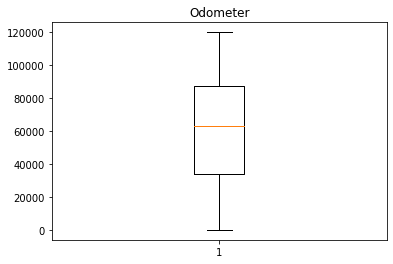

In [ ]:
plt.boxplot(df['odometer'])
plt.title('Odometer')

plt.show()

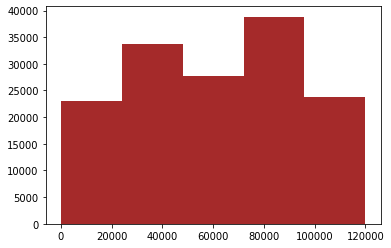

In [ ]:
plt.hist(df["odometer"], bins = 5, color = "brown")
plt.show()

#### 2.2.2 Price

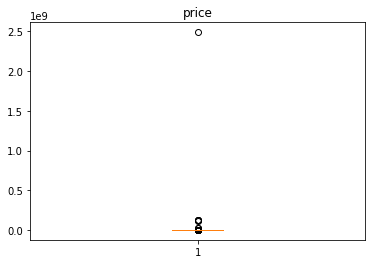

In [ ]:
plt.boxplot(df['price'])
plt.title('price')


plt.show()

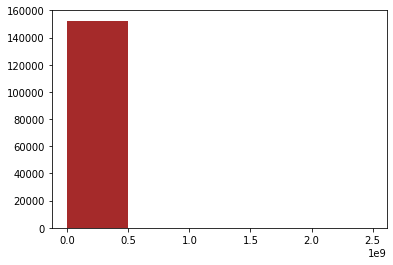

In [ ]:
plt.hist(df["price"], bins = 5, color = "brown")
plt.show()

karena terdapat outlier yang menyebabkan jarak antar harga sangat jauh, maka akan dilakukan drop

In [ ]:
#untuk mendefine Q3 dan Q1 dari price
Q3_price= df.describe()['price']['75%']
Q1_price = df.describe()['price']['25%']
print('Q3_price: ',Q3_price)
print('Q1_price: ',Q1_price)
#untuk mencari IQR dari funding total usd
IQR_price = Q3_price-Q1_price
print('IQR_price',IQR_price)
#untuk mencari upper fence
UpperFence_price = Q3_price + (1.5*IQR_price)
print('UpperFence price: ',UpperFence_price)
#untuk mencari lower fence
LowerFence_price = Q1_price - (1.5*IQR_price)
print('lowerFence price: ',LowerFence_price)


Q3_price:  27499.0
Q1_price:  11917.5
IQR_price 15581.5
UpperFence price:  50871.25
lowerFence price:  -11454.75


In [ ]:
#untuk menampilkan data outlier
Outliers = df[(df['price'] < LowerFence_price) | (df['price'] > UpperFence_price)]
Outliers.sort_values(by= 'price', ascending=False)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,vin,drive,size,type,paint_color,image_url,description,county,state,lat,long
67033,7194267441,https://atlanta.craigslist.org/nat/ctd/d/dulut...,atlanta,https://atlanta.craigslist.org,2490531375,2014.0,dodge,dart,good,4 cylinders,gas,112589.0,clean,automatic,NaN,fwd,compact,sedan,red,https://images.craigslist.org/00D0D_8XwNW5LjBT...,"J.P. AUTO ENTERPRISE 3558 BUFORD HWY, SUITE B-...",NaN,ga,33.9845,-84.1529
214579,7191387613,https://dayton.craigslist.org/cto/d/enon-2009-...,dayton / springfield,https://dayton.craigslist.org,123456789,2009.0,cadillac,dts,excellent,8 cylinders,gas,87000.0,clean,automatic,NaN,fwd,full-size,sedan,white,https://images.craigslist.org/00u0u_b1WF85OU6n...,Great condition Cadillac DTS Platinum (loaded ...,NaN,oh,39.8716,-83.9195
142126,7192137741,https://jackson.craigslist.org/cto/d/crystal-s...,jackson,https://jackson.craigslist.org,123456789,2011.0,honda,accord,unknown,other,gas,NaN,clean,automatic,NaN,Unknown,Unknown,other,custom,https://images.craigslist.org/00r0r_1l7RJdkhcB...,Honda Accords for sale from 2009 to 2011. The ...,NaN,ms,32.0186,-90.2996
161455,7194822890,https://spokane.craigslist.org/cto/d/airway-he...,spokane / coeur d'alene,https://spokane.craigslist.org,123456789,2012.0,toyota,fj cruisers,good,6 cylinders,gas,NaN,clean,automatic,NaN,4wd,mid-size,offroad,white,https://images.craigslist.org/00s0s_72o1v6W2Mn...,Testing the waters for my 2012 Toyota Fj Cruis...,NaN,id,47.6406,-117.5950
311152,7186887656,https://ocala.craigslist.org/cto/d/lady-lake-w...,ocala,https://ocala.craigslist.org,111111111,2015.0,other,SUV OR CAR,excellent,other,gas,NaN,clean,automatic,NaN,Unknown,Unknown,other,custom,https://images.craigslist.org/00z0z_jWMStybBqn...,WANTED A GOOD SUV OR CAR MUST BE IN EXCELLENT ...,NaN,fl,28.9299,-81.9256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328398,7180575464,https://charleston.craigslist.org/cto/d/charle...,charleston,https://charleston.craigslist.org,50888,2014.0,bmw,m5,excellent,8 cylinders,gas,33000.0,clean,automatic,NaN,rwd,full-size,sedan,white,https://images.craigslist.org/00U0U_5zCDXrH3ry...,2014 BMW M5 - I searched for well over 12 mont...,NaN,sc,32.8638,-79.9069
93497,7186502845,https://greenbay.craigslist.org/ctd/d/green-ba...,green bay,https://greenbay.craigslist.org,50880,2020.0,chevrolet,suburban,excellent,8 cylinders,gas,11496.0,clean,automatic,1GNSKHKC3LR234410,4wd,full-size,SUV,grey,https://images.craigslist.org/00o0o_9DPYcggzlE...,2020 Chevrolet Suburban LT - Shadow Gray Metal...,NaN,wi,44.4737,-88.0631
87241,7186034633,https://appleton.craigslist.org/ctd/d/green-ba...,appleton-oshkosh-FDL,https://appleton.craigslist.org,50880,2020.0,chevrolet,suburban,excellent,8 cylinders,gas,11496.0,clean,automatic,1GNSKHKC3LR234410,4wd,full-size,SUV,grey,https://images.craigslist.org/00z0z_7Z3ozVXkJK...,2020 Chevrolet Suburban LT - Shadow Gray Metal...,NaN,wi,44.4737,-88.0631
233309,7190144518,https://eugene.craigslist.org/ctd/d/portland-2...,eugene,https://eugene.craigslist.org,50875,2015.0,gmc,sierra 2500,unknown,8 cylinders,diesel,88564.0,clean,automatic,1GT12ZE81FF538309,4wd,Unknown,truck,custom,https://images.craigslist.org/00I0I_eBk96HoHk7...,"Sunrise Auto SalesTry our Delivery Service , N...",NaN,or,45.4072,-122.6250


In [ ]:
print('Persen data outlier pada price:',len(Outliers)/len(df['price'])*100 )
print('Total data outliers pada price:', len(Outliers))
df = df.drop(df[(df['price'] < LowerFence_price) | (df['price'] > UpperFence_price)].index)


Persen data outlier pada price: 3.473229105843606
Total data outliers pada price: 5294


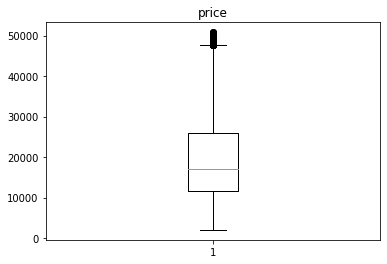

In [ ]:
plt.boxplot(df['price'])
plt.title('price')


plt.show()

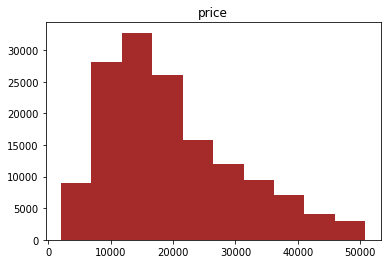

In [ ]:
plt.hist(df["price"], bins = 10, color = "brown")
plt.title('price')
plt.show()

#### 2.2.3 Year

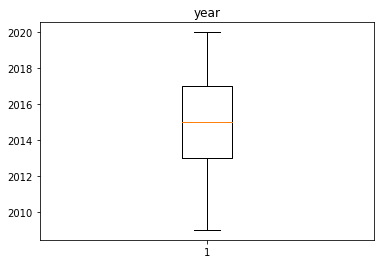

In [ ]:
plt.boxplot(df['year'])
plt.title('year')

plt.show()

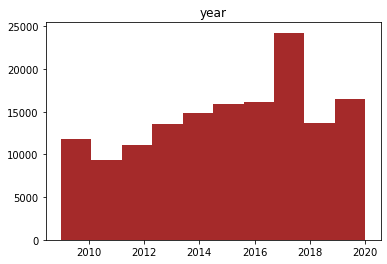

In [ ]:
plt.hist(df["year"], bins = 10, color = "brown")
plt.title('year')
plt.show()

In [ ]:
df.shape

(147129, 25)

In [ ]:
df.isna().sum()

id                   0
url                  0
region               0
region_url           0
price                0
year                 0
manufacturer         0
model                0
condition            0
cylinders            0
fuel                 0
odometer             0
title_status         0
transmission         0
vin              49851
drive                0
size                 0
type                 0
paint_color          0
image_url            0
description          2
county          147129
state                0
lat                927
long               927
dtype: int64

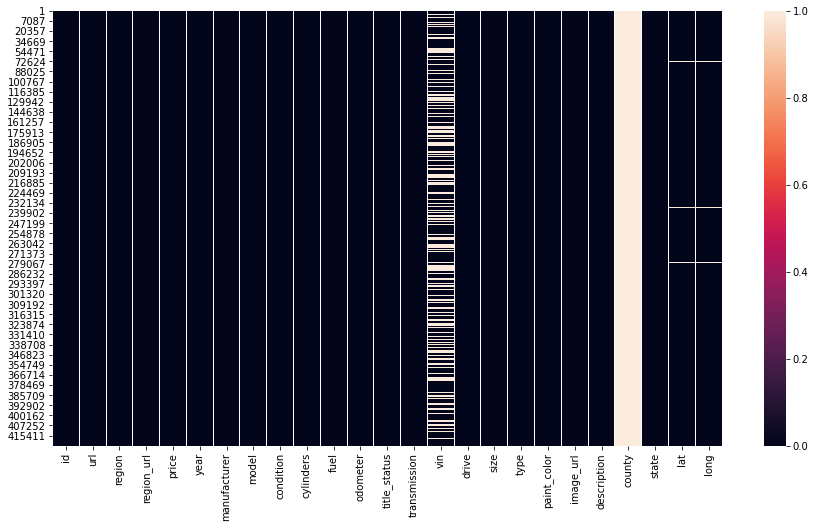

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df.isna())
plt.show()

In [ ]:
df.to_csv(r'gdrive/My Drive/folder final project/datafull.csv')


###  2.3 Drop Column

In [ ]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

Karena terdapat beberapa kolom yang tidak dapat digunakan untuk melakukan Eksplorasi Data Analysis dan Modeling pada Machine Learning, maka akan dilakukan drop pada kolom-kolom tersebut.
Kolom yang akan didrop yaitu:
1. id 
2. url
3. region
4. region url
5. vin
6. image_url
7. description
8. county
9. long
10. lat

In [ ]:
df_temp = df.drop(['id','url','region','region_url','vin','image_url','description','county','long','lat'],axis=1)

In [ ]:
print('Total rows:',df_temp.shape[0] )
print('Total kolom: ',df_temp.shape[1])
print('Daftar kolom: ',df_temp.columns)


Total rows: 147129
Total kolom:  15
Daftar kolom:  Index(['price', 'year', 'manufacturer', 'model', 'condition', 'cylinders',
       'fuel', 'odometer', 'title_status', 'transmission', 'drive', 'size',
       'type', 'paint_color', 'state'],
      dtype='object')


In [ ]:
df_temp.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
1,8750,2013,hyundai,sonata,excellent,4 cylinders,gas,90821,clean,automatic,fwd,Unknown,other,grey,mn
2,10900,2013,toyota,prius,good,4 cylinders,hybrid,92800,clean,automatic,fwd,Unknown,other,blue,ct
6,7995,2010,chevrolet,equinox,good,4 cylinders,gas,108124,clean,automatic,4wd,full-size,SUV,grey,mn
17,14995,2011,chevrolet,silverado 1500,good,8 cylinders,gas,102462,clean,automatic,4wd,full-size,truck,blue,mn
18,37500,2009,other,international 8600,excellent,6 cylinders,diesel,87691,clean,manual,fwd,full-size,truck,white,nm


In [ ]:
df_temp.describe()

,price,year,odometer
count,147129.000000,147129.000000,147129.000000
mean,19650.135194,2014.991626,61359.974866
std,10635.140046,2.862059,32203.592958
min,2000.000000,2009.000000,0.000000
25%,11590.000000,2013.000000,34047.000000
50%,16995.000000,2015.000000,63172.000000
75%,25988.000000,2017.000000,87371.000000
max,50835.000000,2020.000000,120000.000000


In [ ]:
df_temp.describe(include='O')

,manufacturer,model,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,state
count,147129,147129,147129,147129,147129,147129,147129,147129,147129,147129,147129,147129
unique,38,12011,7,8,5,5,3,4,5,12,12,51
top,ford,f-150,unknown,other,gas,clean,automatic,fwd,Unknown,other,custom,ca
freq,25653,2683,73459,63617,130784,139033,131888,47600,108559,41466,47074,15332


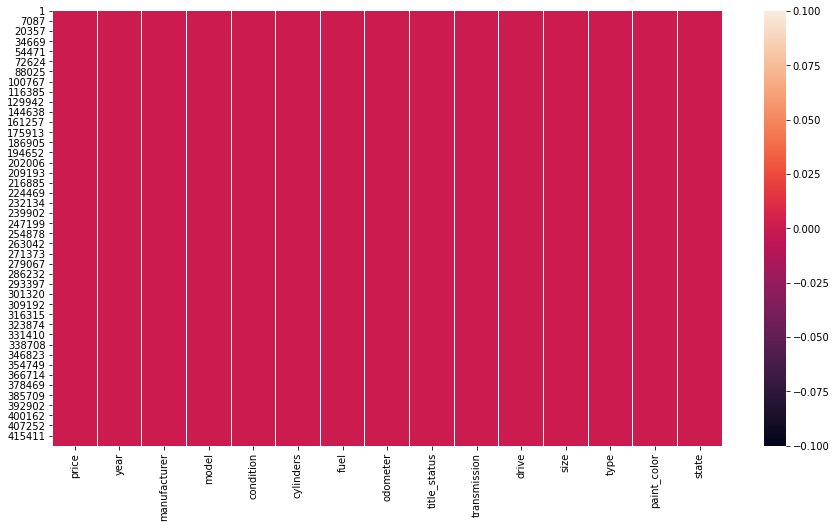

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(df_temp.isnull())
plt.show()

In [ ]:
df_temp.to_csv(r'gdrive/My Drive/folder final project/data_for_eda.csv')
